In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
wine = pd.read_csv("../06_machine_learning/data/winequality-white.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

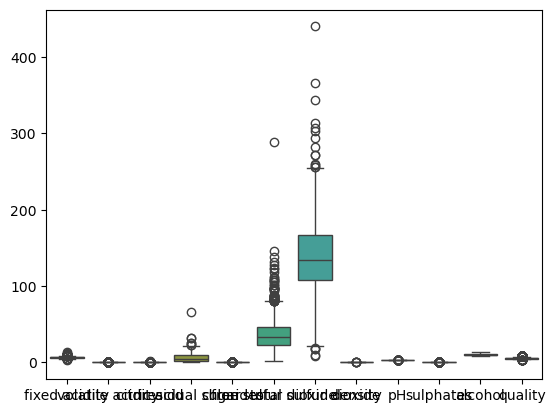

In [4]:
sns.boxplot(wine)

In [5]:
wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [6]:
X = wine.drop('quality', axis=1).copy()
y = wine['quality'].copy()
y2 = wine['quality'].copy()

In [7]:
# 스케일링하기 

from sklearn.preprocessing import RobustScaler


# 이상치가 많기 때문에 RobustScaler 로 사용한다. 

In [8]:
rs2 =  RobustScaler() # 중앙값과 IQR 을 사용한 스케일링

X_scaled = rs2.fit_transform(X)
X_scaled

# 중앙값을 기준으로 스케일링하고, 사분위 범위를 사용하여 이상치의 영향을 줄인다. 
# 이상치에 강한 스케일링 방법

array([[ 0.2       ,  0.09090909,  0.33333333, ..., -0.94736842,
        -0.14285714, -0.84210526],
       [-0.5       ,  0.36363636,  0.16666667, ...,  0.63157895,
         0.14285714, -0.47368421],
       [ 1.3       ,  0.18181818,  0.66666667, ...,  0.42105263,
        -0.21428571, -0.15789474],
       ...,
       [-0.3       , -0.18181818, -1.08333333, ..., -1.        ,
        -0.07142857, -0.52631579],
       [-1.3       ,  0.27272727, -0.16666667, ...,  0.84210526,
        -0.64285714,  1.26315789],
       [-0.8       , -0.45454545,  0.5       , ...,  0.42105263,
        -1.07142857,  0.73684211]])

In [9]:
y = pd.get_dummies(y)
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# 데이터 4000개이니 valid 로 하기 

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [18]:
# 1) Sequential

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report

In [13]:
X_train.shape[1]

11

In [14]:
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))   # 입력층
model2.add(Dense(32, activation='relu'))                  # 은닉층 1
model2.add(Dense(64, activation='relu'))                  # 은닉층 2
model2.add(Dense(32, activation='relu'))                  # 은닉층 3
model2.add(Dense(16, activation='relu'))                  # 은닉층 4
model2.add(Dense(7, activation='softmax'))                # 출력층, 다중분류
# 클래스가 7개이기 때문에 7을 준다.
model2.summary()

# 다중분류

2024-09-10 14:47:51.714570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 7)                 119       
                                                                 
Total params: 7,687
Trainable params: 7,687
Non-trainabl

2024-09-10 14:47:51.716332: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-10 14:47:51.787792: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:47:51.787841: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-10 14:47:51.787863: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


In [15]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience = 100)
filepath = "./model/white_wine{epoch:04d}__{val_loss:.4f}.keras"
model_save = ModelCheckpoint(filepath = filepath, save_best_only=True)
history2 = model2.fit(X_train, y_train, epochs = 10000, batch_size = 500, validation_data = (X_valid, y_valid), callbacks = [early_stop, model_save]) 

Epoch 1/10000


2024-09-10 14:47:52.553923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:47:52.612159: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:47:52.612233: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 2s 99ms/step - loss: 1.9010 - accuracy: 0.2049 - val_loss: 1.8530 - val_accuracy: 0.3745
Epoch 2/10000
1/6 [====>.........................] - ETA: 0s - loss: 1.8373 - accuracy: 0.4720

2024-09-10 14:47:53.508257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:47:53.535917: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:47:53.535983: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 0s 29ms/step - loss: 1.8020 - accuracy: 0.4523 - val_loss: 1.7453 - val_accuracy: 0.4469
Epoch 3/10000
6/6 [==============================] - 0s 31ms/step - loss: 1.6862 - accuracy: 0.4493 - val_loss: 1.6168 - val_accuracy: 0.4480
Epoch 4/10000
6/6 [==============================] - 0s 33ms/step - loss: 1.5490 - accuracy: 0.4489 - val_loss: 1.4837 - val_accuracy: 0.4469
Epoch 5/10000
6/6 [==============================] - 0s 40ms/step - loss: 1.4167 - accuracy: 0.4571 - val_loss: 1.3713 - val_accuracy: 0.4633
Epoch 6/10000
6/6 [==============================] - 0s 36ms/step - loss: 1.3149 - accuracy: 0.4997 - val_loss: 1.3030 - val_accuracy: 0.4867
Epoch 7/10000
6/6 [==============================] - 0s 31ms/step - loss: 1.2555 - accuracy: 0.5235 - val_loss: 1.2611 - val_accuracy: 0.5051
Epoch 8/10000
6/6 [==============================] - 0s 34ms/step - loss: 1.2281 - accuracy: 0.5242 - val_loss: 1.2416 - val_accuracy: 0.5071
Epoch 9/10000
6/6 [=

6/6 [==============================] - 0s 16ms/step - loss: 0.8980 - accuracy: 0.6253 - val_loss: 1.0598 - val_accuracy: 0.5561
Epoch 60/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.8957 - accuracy: 0.6249 - val_loss: 1.0598 - val_accuracy: 0.5551
Epoch 61/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.8927 - accuracy: 0.6293 - val_loss: 1.0591 - val_accuracy: 0.5622
Epoch 62/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.8902 - accuracy: 0.6280 - val_loss: 1.0737 - val_accuracy: 0.5510
Epoch 63/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.8875 - accuracy: 0.6307 - val_loss: 1.0661 - val_accuracy: 0.5551
Epoch 64/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.8798 - accuracy: 0.6338 - val_loss: 1.0646 - val_accuracy: 0.5633
Epoch 65/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.8771 - accuracy: 0.6372 - val_loss: 1.0633 - val_accuracy: 0.5571
Epoch 66/10000

6/6 [==============================] - 0s 16ms/step - loss: 0.6987 - accuracy: 0.7226 - val_loss: 1.2269 - val_accuracy: 0.5816
Epoch 117/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.6984 - accuracy: 0.7246 - val_loss: 1.2070 - val_accuracy: 0.5806
Epoch 118/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.6953 - accuracy: 0.7270 - val_loss: 1.2054 - val_accuracy: 0.5867
Epoch 119/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.6911 - accuracy: 0.7270 - val_loss: 1.2239 - val_accuracy: 0.5867
Epoch 120/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.6860 - accuracy: 0.7304 - val_loss: 1.1978 - val_accuracy: 0.5714
Epoch 121/10000
6/6 [==============================] - 0s 15ms/step - loss: 0.6782 - accuracy: 0.7383 - val_loss: 1.2107 - val_accuracy: 0.5888
Epoch 122/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.6820 - accuracy: 0.7342 - val_loss: 1.1993 - val_accuracy: 0.5786
Epoch 12

In [19]:
wine_best_model = load_model("./model/white_wine0054__1.0568.keras")
wine_pred = wine_best_model.predict(X_test)
wine_pred = pd.DataFrame(wine_pred, columns = y.columns)

31/31 [==============================] - 0s 4ms/step


2024-09-10 14:49:37.670096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:49:37.800029: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:49:37.800100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 14:49:37.814751: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:49:37.814844: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [20]:
wine_pred 

,3,4,5,6,7,8,9
0,0.000810,0.012706,0.201264,0.713881,0.067780,0.003252,0.000308
1,0.005689,0.015725,0.082667,0.575807,0.266987,0.052112,0.001014
2,0.004498,0.172154,0.322061,0.364143,0.132409,0.002944,0.001790
3,0.000769,0.006318,0.069184,0.676899,0.237136,0.009608,0.000086
4,0.001719,0.006446,0.141600,0.705490,0.125645,0.018788,0.000313
...,...,...,...,...,...,...,...
975,0.008449,0.031840,0.538678,0.389349,0.018900,0.008899,0.003885
976,0.001661,0.602809,0.295876,0.066721,0.032486,0.000095,0.000352
977,0.002192,0.020843,0.090549,0.612723,0.261726,0.011838,0.000131
978,0.006230,0.114142,0.492076,0.334966,0.045526,0.002929,0.004129


In [21]:
y_test_class = y_test.idxmax(axis = 1)
y_test_class = y_test_class.reset_index(drop=True)
y_test_class

0      6
1      6
2      7
3      7
4      5
      ..
975    6
976    4
977    5
978    6
979    6
Length: 980, dtype: int64

In [22]:
wine_pred_class = wine_pred.idxmax(axis=1)
wine_pred_class 

0      6
1      6
2      6
3      6
4      6
      ..
975    5
976    4
977    6
978    5
979    5
Length: 980, dtype: int64

In [23]:
print(classification_report(y_test_class, wine_pred_class ))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.67      0.06      0.11        33
           5       0.59      0.55      0.57       291
           6       0.55      0.73      0.62       440
           7       0.53      0.36      0.43       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.56       980
   macro avg       0.33      0.24      0.25       980
weighted avg       0.54      0.56      0.53       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r